In [1]:
import nltk
from nltk.book import *
from nltk.stem.porter import *
from nltk.stem import * 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer #regular expression tokenizer
from nltk import FreqDist

from nltk.corpus import gutenberg as g
from nltk.corpus import brown
from nltk.corpus import nps_chat

import re  # regular expression 

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer #for Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer # for Term Frequency Inverse Document Frequency



*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
pwd()

'C:\\Users\\Bayd-Brisht\\Desktop\\Final Semester\\NLP\\Jupyter Notebooks'

### Note on DataFrame

In [3]:

books = ['Action', 'Romance', 'Social Comedy', 'Philosophy', 'Politics', 'Psychology', 'Medical', 'Movies Reviews']
print(books)
books_dframe = pd.DataFrame(books)
books_dframe.head()

['Action', 'Romance', 'Social Comedy', 'Philosophy', 'Politics', 'Psychology', 'Medical', 'Movies Reviews']


,0
0,Action
1,Romance
2,Social Comedy
3,Philosophy
4,Politics


In [5]:
# from numpy import genfromtxt

# my_data = genfromtxt('train.tsv', delimiter='\t')

import csv

tsvFile = open('train.tsv')
tsv_read = csv.reader(tsvFile, delimiter='\t')

# for i in tsv_read:
#     print(i, "\n")

In [6]:
from bs4 import BeautifulSoup
import urllib.request  

In [10]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/COVID-19_pandemic')
raw_wiki = raw_html.read()

soup_wiki = BeautifulSoup(raw_wiki, 'html.parser')


wiki_text = soup_wiki.get_text()

# print(wiki_text)

In [11]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')  
raw_html = raw_html.read()

article_html = BeautifulSoup(raw_html, 'html.parser')

article_paragraphs = article_html.find_all('p')

article_text = ''

for para in article_paragraphs:  
    article_text += para.text
    
    
print(article_text)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The result is a computer capable of ‘understanding’ the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. 
Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.
Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated inte

### Note on Dictionaries

In [8]:
dict_example = {'Books': ['Action', 'Comedy', 'Biography'],
               'Movies': ['Fantasy', 'Social', 'History'],
               'Grocery': ['Tomatoes', 'Lettuce', 'Potatoes']}

In [9]:
for i in dict_example.keys():
    print(i)

Books
Movies
Grocery


In [10]:
# list(dict_example)
keys = list(dict_example.keys())
keys

['Books', 'Movies', 'Grocery']

In [11]:
values = list(dict_example.values())
values

[['Action', 'Comedy', 'Biography'],
 ['Fantasy', 'Social', 'History'],
 ['Tomatoes', 'Lettuce', 'Potatoes']]

In [12]:
items = dict_example.items()

for pair in items:
    print(pair)

('Books', ['Action', 'Comedy', 'Biography'])
('Movies', ['Fantasy', 'Social', 'History'])
('Grocery', ['Tomatoes', 'Lettuce', 'Potatoes'])


#### Convert a dictionary to a Pandas DataFrame

In [13]:
dict_frame = pd.DataFrame(dict_example)
dict_frame

,Books,Movies,Grocery
0,Action,Fantasy,Tomatoes
1,Comedy,Social,Lettuce
2,Biography,History,Potatoes


#### Convert numpy array to Pandas DataFrame

In [14]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
a_frame = pd.DataFrame(a)
a_frame

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


## Loading Data

In [16]:
data = pd.read_csv('train.tsv', sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [17]:
np_data = np.array(data) # convert to numpy array
np_data

array([[1, 1,
        'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
        1],
       [2, 1,
        'A series of escapades demonstrating the adage that what is good for the goose',
        2],
       [3, 1, 'A series', 2],
       ...,
       [156058, 8544, 'avuncular chortles', 3],
       [156059, 8544, 'avuncular', 2],
       [156060, 8544, 'chortles', 2]], dtype=object)

#### This data has 5 sentiment labels:
 
#####    0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive



In [19]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.2+ MB


In [41]:
data.Sentiment.value_counts()


2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

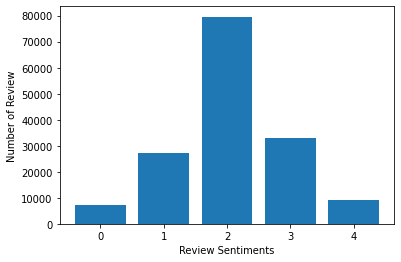

In [44]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Text Feature Generation using Bag of Words (BoW) 
#### Generate Document Term matrix by using scikit-learn's CountVectorizer.
#### The Document Term matrix can use a single word (similar to what we saw in class. Check powerpoint file). It can also be a combination of two or more words, which is called a bigram or trigram model and the general approach is called the n-gram model.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# bigrams
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize) 

# cols_names = cv.get_feature_names()
text_counts= cv.fit_transform(data['Phrase'])


In [22]:
# print(text_counts)

# display sparse matrix as a pandas dataframe
pd.DataFrame.sparse.from_spmatrix(text_counts[20:150])


,0,1,2,3,4,5,6,7,8,9,...,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Another Example of CountVectorizer

In [209]:
 from sklearn.feature_extraction.text import CountVectorizer
    
    
corpus = [
    'This is the first REVIEW.',
    'This review is the second review.',
    'And this is the third one.',
    'Is this the first review?',
]
vectorizer = CountVectorizer(ngram_range = (1,1))
X = vectorizer.fit_transform(corpus)

print("Vocab: ", vectorizer.get_feature_names(), "\n")
print("Feature Vectors:\n", X.toarray(), "\n")



vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 3)) #unigrams and bigrams
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())

wds = vectorizer2.get_feature_names()


Vocab:  ['and', 'first', 'is', 'one', 'review', 'second', 'the', 'third', 'this'] 

Feature Vectors:
 [[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]] 

['and this', 'and this is', 'first review', 'is the', 'is the first', 'is the second', 'is the third', 'is this', 'is this the', 'review is', 'review is the', 'second review', 'the first', 'the first review', 'the second', 'the second review', 'the third', 'the third one', 'third one', 'this is', 'this is the', 'this review', 'this review is', 'this the', 'this the first']


list

In [210]:
print("pandas sparse matrix display: ") 
pd.DataFrame.sparse.from_spmatrix(X2, index=corpus, columns = wds )

pandas sparse matrix display: 


,and this,and this is,first review,is the,is the first,is the second,is the third,is this,is this the,review is,...,the second review,the third,the third one,third one,this is,this is the,this review,this review is,this the,this the first
This is the first REVIEW.,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
This review is the second review.,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
And this is the third one.,1,1,0,1,0,0,1,0,0,0,...,0,1,1,1,1,1,0,0,0,0
Is this the first review?,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


### Text Feature Generation using TF-IDF

In [212]:

tf=TfidfVectorizer(ngram_range=(3, 3)) #bigrams and trigrams
text_tf= tf.fit_transform(corpus)
terms = tf.get_feature_names()
terms

['and this is',
 'is the first',
 'is the second',
 'is the third',
 'is this the',
 'review is the',
 'the first review',
 'the second review',
 'the third one',
 'this is the',
 'this review is',
 'this the first']

In [213]:
# print(text_tf)
print("pandas sparse matrix display: ") 
pd.DataFrame.sparse.from_spmatrix(text_tf, index=corpus, columns=terms)

pandas sparse matrix display: 


,and this is,is the first,is the second,is the third,is this the,review is the,the first review,the second review,the third one,this is the,this review is,this the first
This is the first REVIEW.,0.000000,0.667679,0.0,0.000000,0.000000,0.0,0.526405,0.0,0.000000,0.526405,0.0,0.000000
This review is the second review.,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.5,0.000000,0.000000,0.5,0.000000
And this is the third one.,0.525473,0.000000,0.0,0.525473,0.000000,0.0,0.000000,0.0,0.525473,0.414289,0.0,0.000000
Is this the first review?,0.000000,0.000000,0.0,0.000000,0.617614,0.0,0.486934,0.0,0.000000,0.000000,0.0,0.617614


In [120]:

# print sparse matrix
# pd.DataFrame.sparse.from_spmatrix(text_tf)


In [ ]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(corpus)
terms = tf.get_feature_names()
pd.DataFrame.sparse.from_spmatrix(text_tf)

### Note: Preprocessing Function
### Generally it's good to have one function for preprocessing, that you call each time you preprocess a text.

In [172]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    data = remove_single_characters(data)
    data = convert_numbers(data)
    data = remove_stop_words(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)

In [173]:
corpus =  ["you were born with potential",
"you were born with goodness and trust",
"you were born with ideals and dreams",
"you were born with greatness",
"you were born with wings",
"you are not meant for crawling, so don't",
"you have wings",
"learn to use them and fly"
]

In [174]:
#bag of words

count_vect = CountVectorizer()
bow = count_vect.fit_transform(corpus)
terms = count_vect.get_feature_names()

In [175]:

# print sparse matrix
pd.DataFrame.sparse.from_spmatrix(bow,index=corpus,columns=terms) #[1:10]

,and,are,born,crawling,don,dreams,fly,for,goodness,greatness,...,potential,so,them,to,trust,use,were,wings,with,you
you were born with potential,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
you were born with goodness and trust,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
you were born with ideals and dreams,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
you were born with greatness,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
you were born with wings,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
"you are not meant for crawling, so don't",0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
you have wings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
learn to use them and fly,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [181]:
#transform the tf idf vectorizer

vect = TfidfVectorizer(ngram_range=(2,2))
tf_idf = vect.fit_transform(corpus)
terms = vect.get_feature_names()

In [191]:

# print sparse matrix
pd.DataFrame.sparse.from_spmatrix(tf_idf,index=corpus,columns=terms)[0:5]

,and dreams,and fly,and trust,are not,born with,crawling so,for crawling,goodness and,have wings,ideals and,...,use them,were born,with goodness,with greatness,with ideals,with potential,with wings,you are,you have,you were
you were born with potential,0.000000,0.0,0.000000,0.0,0.402443,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.402443,0.000000,0.000000,0.000000,0.717021,0.000000,0.0,0.0,0.402443
you were born with goodness and trust,0.000000,0.0,0.503469,0.0,0.282582,0.0,0.0,0.503469,0.0,0.000000,...,0.0,0.282582,0.503469,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.282582
you were born with ideals and dreams,0.503469,0.0,0.000000,0.0,0.282582,0.0,0.0,0.000000,0.0,0.503469,...,0.0,0.282582,0.000000,0.000000,0.503469,0.000000,0.000000,0.0,0.0,0.282582
you were born with greatness,0.000000,0.0,0.000000,0.0,0.402443,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.402443,0.000000,0.717021,0.000000,0.000000,0.000000,0.0,0.0,0.402443
you were born with wings,0.000000,0.0,0.000000,0.0,0.402443,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.402443,0.000000,0.000000,0.000000,0.000000,0.717021,0.0,0.0,0.402443
